<a href="https://colab.research.google.com/github/Ishmeet7/Sentiment_Analysis/blob/main/imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Importing libraries**

In [77]:
!pip install contractions

In [78]:
import pandas as pd  #for importing data and data pre processing
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re             #for regex functions
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import contractions
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


###**Loading data**

In [79]:
df=pd.read_csv(r"/content/drive/MyDrive/IMDB Dataset.csv")  #reading data from csv

###**Exploratory data analysis**

In [80]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [81]:
df['review'].iloc[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [82]:
df.shape

(50000, 2)

In [83]:
df['review'].isna().sum()

0

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [85]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [86]:
#checking what percentage of reviews are positive  and negative
df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [87]:
df.drop_duplicates(subset='review',inplace=True)  #dropping duplicate reviews

df.shape

(49582, 2)

Text(0.5, 1.0, 'Sentiment distribution')

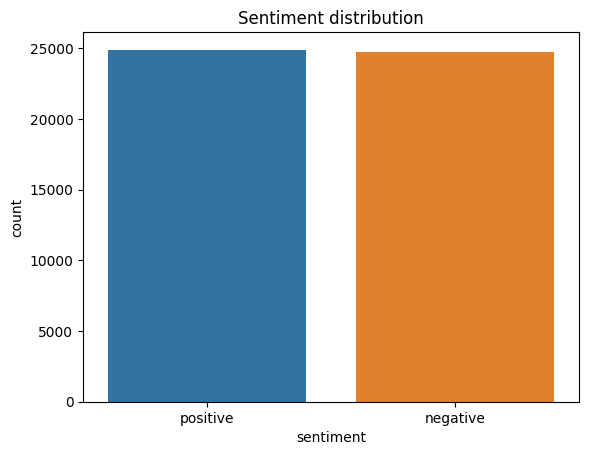

In [88]:
sns.countplot(x='sentiment',data=df)
plt.title('Sentiment distribution')

In [89]:
df.sentiment.value_counts()

positive    24884
negative    24698
Name: sentiment, dtype: int64

No. of positive reviews in dataset decrease after removing duplicates

In [90]:
def count_words(text): #counting words in each review
  words=text.split()
  word_count=len(words)
  return word_count


In [91]:
df['word_count']=df['review'].apply(count_words)

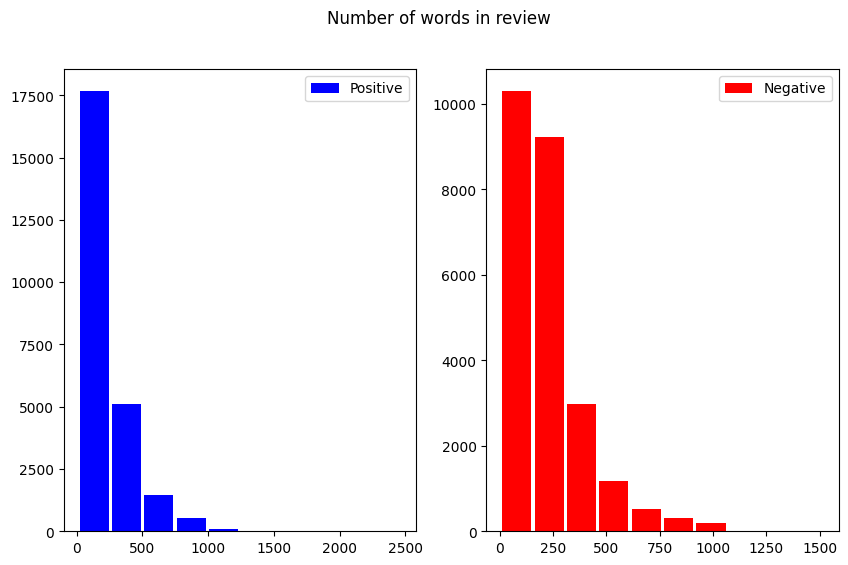

In [92]:

  fig, ax = plt.subplots(1,2, figsize=(10,6))
  ax[0].hist(df[df['sentiment'] == 'positive']['word_count'], label='Positive', color='blue', rwidth=0.9);
  ax[0].legend(loc='upper right');
  ax[1].hist(df[df['sentiment'] == 'negative']['word_count'], label='Negative', color='red', rwidth=0.9);
  ax[1].legend(loc='upper right');
  fig.suptitle("Number of words in review")
  plt.show()

We can clearly observe that negative reviews contain more words.

###**Cleaning data**
Steps:

1.Converting text to lowercase

2.Removing HTML tags

3.Removing special characters and punctuations

4.Expanding contraction so that they are treated same.

5.removing stop words

6.Finally tokenization and stemming



In [93]:

def preprocess(text):
    text=text.lower() #converting text to lower case

    text = BeautifulSoup(text, 'html.parser').get_text() # Remove HTML tags

    text = re.sub('[^a-zA-Z0-9\s]', '', text)  # Remove special characters

    if True:                                   # Expand contractions
        expanded_words = []
        for word in text.split():
        # using contractions.fix to expand the shortened words
          expanded_words.append(contractions.fix(word))

        text = ' '.join(expanded_words)

    text=text.translate(str.maketrans('','',string.punctuation))  #removing punctuations


    # Tokenize the text
    tokens = word_tokenize(text)

    # Removing stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    #tokens = [textblob.TextBlob(token).correct() for token in tokens]

    # Stem the tokens
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    #clean_text = " ".join(stemmed_tokens)
    clean_text = " ".join([str(token) for token in stemmed_tokens])

    return clean_text

In [ ]:
df['review']=df['review'].apply(preprocess)

In [ ]:
df.drop_duplicates(subset='review',inplace=True)

In [ ]:
df.head(5)

In [ ]:
pos_reviews =  df[df.sentiment == 'positive']
pos_reviews.head()

Create wordcloud

In [ ]:
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

###**Model training**

Vectorize text

In [ ]:
# Create a bag-of-words model

vectorizer = CountVectorizer()

vectorized = vectorizer.fit_transform(df['review'])

Split into train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(vectorized, df['sentiment'], test_size=0.2)


In [ ]:
print("Size of x_train: ", (X_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (X_test.shape))
print("Size of y_test: ", (y_test.shape))

In [ ]:


clf = LogisticRegression(solver='saga',max_iter=10000)

clf.fit(X_train, y_train)
log_pred=clf.predict(X_test)
# Evaluate the classifier on the test set
score = clf.score(y_test, log_pred)
print('Accuracy:', score)
print(confusion_matrix(y_test, log_pred))

# Predict the sentiment of a new review
# new_review = 'The movie was great! I really enjoyed it.'
# new_review_vectorized = vectorizer.transform([new_review])
# prediction = clf.predict(new_review_vectorized)
# print('Prediction:', prediction)

In [ ]:

# Create a Naive Bayes classifier

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Predict the sentiment of the test reviews
y_pred = classifier.predict(X_test)
mnb_acc = accuracy_score(y_pred, y_test)
# Evaluate the performance of the classifier
# accuracy = np.mean(y_pred == y_test)
print("Accuracy:", mnb_acc)
print(confusion_matrix(y_test, y_pred))

In [ ]:

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Predict the sentiment of the test reviews
y_pred = classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

In [ ]:
eval_df = pd.concat([lr_eval, mnb_eval, svm_eval, dt_eval, rf_eval, gb_eval], ignore_index = True)
eval_df.reset_index()
eval_df

What performed best,why this model used,assesment of results,success metrics chosed why

Future Improvement Scopes
Hyperparamater Tuning for SVM & Ensemble learning models

Word Embeddings & Transfer Learning Model

Use word embedding instead of TF-IDF
Use existing transfer learning models (e.g. BERT)